In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV , train_test_split

In [32]:
df = pd.read_excel(r"C:\Users\MANISH SHARMA\Desktop\datasets\kaggle\air_train.xlsx")


df1 = pd.read_excel(r"C:\Users\MANISH SHARMA\Desktop\datasets\kaggle\air_test.xlsx")


df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [33]:
df.dropna(inplace = True)
df1.dropna(inplace = True)

In [34]:
#train

df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"]).dt.day

df["Dep_Time_hr"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Time_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df["Arrival_Time_hr"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Time_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

#test

df1["Journey_month"] = pd.to_datetime(df1["Date_of_Journey"]).dt.month
df1["Journey_day"] = pd.to_datetime(df1["Date_of_Journey"]).dt.day

df1["Dep_Time_hr"] = pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_Time_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute

df1["Arrival_Time_hr"] = pd.to_datetime(df1["Arrival_Time"]).dt.hour
df1["Arrival_Time_min"] = pd.to_datetime(df1["Arrival_Time"]).dt.minute




In [35]:
df.drop(["Date_of_Journey" , "Dep_Time" , "Arrival_Time","Additional_Info","Route"] , axis =1 , inplace = True)
df1.drop(["Date_of_Journey" , "Dep_Time" , "Arrival_Time","Additional_Info","Route"] , axis =1 , inplace = True)


In [36]:
le = LabelEncoder()
df["Source"] = le.fit_transform(df["Source"])
df["Destination"] = le.fit_transform(df["Destination"])

df1["Source"] = le.fit_transform(df1["Source"])
df1["Destination"] = le.fit_transform(df1["Destination"])



In [37]:
print(df.Airline.value_counts())
print(df1.Airline.value_counts())


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dt

In [38]:
#mapping

stop = {
    "non-stop":0,
    "1 stop":1,
    "2 stops":2,
    "3 stops":3,
    "4 stops":4
}

df.loc[: , "Total_Stops"] = df["Total_Stops"].map(stop)

df1.loc[: , "Total_Stops"] = df1["Total_Stops"].map(stop)

In [39]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,0,5,2h 50m,0,3897,3,24,22,20,1,10
1,Air India,3,0,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,2,1,19h,2,13882,9,6,9,25,4,25
3,IndiGo,3,0,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,0,5,4h 45m,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,3,0,2h 30m,0,4107,9,4,19,55,22,25
10679,Air India,3,0,2h 35m,0,4145,4,27,20,45,23,20
10680,Jet Airways,0,2,3h,0,7229,4,27,8,20,11,20
10681,Vistara,0,5,2h 40m,0,12648,1,3,11,30,14,10


In [40]:
#change of duration into hr and min
#train

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [41]:
#test
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours_t = []
duration_mins_t = []
for i in range(len(duration)):
    duration_hours_t.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins_t.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [42]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [43]:
df1["Duration_hours"] = duration_hours_t
df1["Duration_mins"] = duration_mins_t

In [44]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,0,5,2h 50m,0,3897,3,24,22,20,1,10,2,50
1,Air India,3,0,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2,1,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,3,0,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,0,5,4h 45m,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,3,0,2h 30m,0,4107,9,4,19,55,22,25,2,30
10679,Air India,3,0,2h 35m,0,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,0,2,3h,0,7229,4,27,8,20,11,20,3,0
10681,Vistara,0,5,2h 40m,0,12648,1,3,11,30,14,10,2,40


In [45]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,Jet Airways,2,1,10h 55m,1,6,6,17,30,4,25,10,55
1,IndiGo,3,0,4h,1,12,5,6,20,10,20,4,0
2,Jet Airways,2,1,23h 45m,1,5,21,19,15,19,0,23,45
3,Multiple carriers,2,1,13h,1,5,21,8,0,21,0,13,0
4,Air Asia,0,2,2h 50m,0,6,24,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,3,0,23h 55m,1,6,6,20,30,20,25,23,55
2667,IndiGo,3,0,2h 35m,0,3,27,14,20,16,55,2,35
2668,Jet Airways,2,1,6h 35m,1,6,3,21,50,4,25,6,35
2669,Air India,2,1,15h 15m,1,6,3,4,0,19,15,15,15


In [46]:
df.drop(["Duration"] , axis =1 , inplace =True)
df1.drop(["Duration"] , axis =1 , inplace =True)


In [53]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [49]:
df1.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [52]:
df = df[df.Airline != 'Trujet']



In [19]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,0,5,0,3897,3,24,22,20,1,10,2,50
1,Air India,3,0,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2,1,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,3,0,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,0,5,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,3,0,0,4107,9,4,19,55,22,25,2,30
10679,Air India,3,0,0,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,0,2,0,7229,4,27,8,20,11,20,3,0
10681,Vistara,0,5,0,12648,1,3,11,30,14,10,2,40


In [54]:
df = df[df.Airline != 'Multiple carriers Premium economy']
df = df[df.Airline != 'Jet Airways Business']
df = df[df.Airline != 'Vistara Premium economy']



df1 = df1[df1.Airline != 'Multiple carriers Premium economy']
df1 = df1[df1.Airline != 'Jet Airways Business']
df1 = df1[df1.Airline != 'Vistara Premium economy']


df

,Airline,Source,Destination,Total_Stops,Price,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,0,5,0,3897,3,24,22,20,1,10,2,50
1,Air India,3,0,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,2,1,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,3,0,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,0,5,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,3,0,0,4107,9,4,19,55,22,25,2,30
10679,Air India,3,0,0,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,0,2,0,7229,4,27,8,20,11,20,3,0
10681,Vistara,0,5,0,12648,1,3,11,30,14,10,2,40


In [55]:
df1.Airline.value_counts()

Jet Airways          897
IndiGo               511
Air India            440
Multiple carriers    347
SpiceJet             208
Vistara              129
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64

In [56]:
df.Airline.value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

In [57]:
#mapping

stop = {
    "Jet Airways":0,
    "IndiGo":1,
    "Air India":2,
    "Multiple carriers":3,
    "SpiceJet":4 , "Vistara":5 ,"Air Asia":6 , "GoAir":7, 
}

df.loc[: , "Airline"] = df["Airline"].map(stop)
df1.loc[: , "Airline"] = df1["Airline"].map(stop)


In [58]:
df.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_month       0
Journey_day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [59]:
df1.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Journey_month       0
Journey_day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [60]:
x = df.drop(["Price"] , axis =1)
y = df.Price
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 100 , test_size = 0.3)

In [61]:
df.dropna(inplace = True)
df.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Journey_month       0
Journey_day         0
Dep_Time_hr         0
Dep_Time_min        0
Arrival_Time_hr     0
Arrival_Time_min    0
Duration_hours      0
Duration_mins       0
dtype: int64

In [62]:
feat = ExtraTreesRegressor()
feat.fit(x_train , y_train)

C:\Users\MANISH SHARMA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

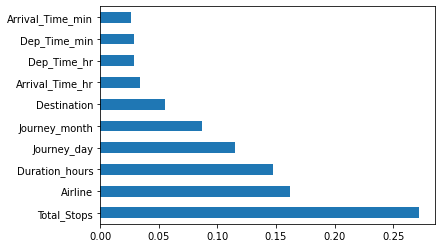

In [63]:
features = pd.Series( feat.feature_importances_ , index = x_train.columns )
features.nlargest(10).plot(kind = "barh")
plt.show()

In [64]:
##create model
lr = LinearRegression()
xgb = XGBRegressor()
rfr = RandomForestRegressor()
dt = DecisionTreeRegressor()

In [65]:
print(lr.fit(x_train , y_train))
print(xgb.fit(x_train , y_train))
print(rfr.fit(x_train , y_train))
print(dt.fit(x_train , y_train))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[18:33:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


C:\Users\MANISH SHARMA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [67]:
#train acc

print(r2_score(lr.predict(x_train) , y_train))
print(r2_score(xgb.predict(x_train) , y_train))
print(r2_score(rfr.predict(x_train) , y_train))
print(r2_score(dt.predict(x_train) , y_train))


-0.11688560203520115
0.6971189098914674
0.9430679789286083
0.9703741070907215


In [68]:
#train acc

print(r2_score(lr.predict(x_test) , y_test))
print(r2_score(xgb.predict(x_test) , y_test))
print(r2_score(rfr.predict(x_test) , y_test))
print(r2_score(dt.predict(x_test) , y_test))


-0.13577598997941132
0.6634602899829265
0.7486083288118233
0.6847676213340586


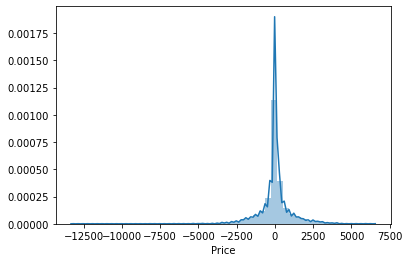

In [69]:
#check distribution
sb.distplot(rfr.predict(x_train) - y_train)

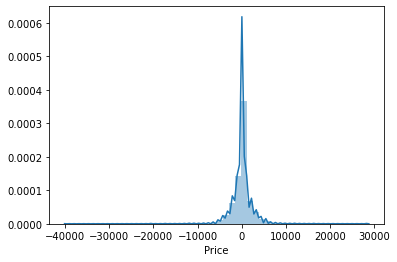

In [70]:
#check  distribution
sb.distplot(rfr.predict(x_test) - y_test)

In [95]:
##hyperparameter tuning


##hyper params tuning


rf_p = {
    
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200)),
    "n_estimators": list(range(1,500))
}

dt_p = {
    "criterion":["mse"],
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200))
}

xgb_p = {
    "learning_rate" : [0.1,0.2,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.5],
    "max_depth" : list(range(1,200)),
    "booster" : ['gbtree', 'gblinear' ,'dart'],
    "min_child_weight" : list(range(1,20)),
    "n_estimators" : list(range(1,200))
}

In [96]:
rscv = RandomizedSearchCV(rfr , param_distributions=rf_p , cv =10 , n_iter=10  ,n_jobs = -1 , verbose = 10)

In [97]:
rscv.fit(x,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  2.0min remaining:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=138,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=263,
                                                   n_jobs=None, oob_score=False,
                                                   random_state...


In [98]:
rscv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, n_estimators=69,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
rfr =RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=35,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, n_estimators=69,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [101]:
rfr.fit(x_train , y_train)
xgb.fit(x_train , y_train)
dt.fit(x_train , y_train)

[18:48:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


DecisionTreeRegressor(criterion='mse', max_depth=143, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [102]:
print(r2_score(rfr.predict(x_test) , y_test))
print(r2_score(xgb.predict(x_test) , y_test))
print(r2_score(dt.predict(x_test) , y_test))



0.7829117453069938
0.7799125426915801
0.7581341453806527


In [90]:
df1

,Airline,Source,Destination,Total_Stops,Journey_month,Journey_day,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hours,Duration_mins
0,0,2,1,1,6,6,17,30,4,25,10,55
1,1,3,0,1,12,5,6,20,10,20,4,0
2,0,2,1,1,5,21,19,15,19,0,23,45
3,3,2,1,1,5,21,8,0,21,0,13,0
4,6,0,2,0,6,24,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,2,3,0,1,6,6,20,30,20,25,23,55
2667,1,3,0,0,3,27,14,20,16,55,2,35
2668,0,2,1,1,6,3,21,50,4,25,6,35
2669,2,2,1,1,6,3,4,0,19,15,15,15


In [103]:
#save the model

file = open(r'C:\Users\MANISH SHARMA\Desktop\vscodes\main_flight_rfr.pkl', "wb")
pickle.dump(rfr , file)



In [104]:
model = open(r'C:\Users\MANISH SHARMA\Desktop\vscodes\main_flight_rfr.pkl', "rb")
forest = pickle.load(model)

In [105]:
#testing pickle file
z = forest.predict(df1.iloc[1:2 , :])

In [106]:
for j in z:
    print(j)

4297.904468599034
